# 2 - Magnets in 2D




__Peter Dunne__

*Applied Magnetism - France*


If we have an infinitely long magnet:
![long_magnet](img/long_magnet.png)

We can approximate it as a 2D Sheet
![2d_sheet](img/2d_sheet.png)

The magnetic field has two components

\begin{equation}
\mathbf{B} = B_x \hat{x} + B_y \hat{y}
\end{equation}


\begin{equation}
B_x = \frac{\mu_0 M_r}{4\pi} \left[\ln {\left(
\frac{{\left(x+a\right)}^2 + {\left(y-b\right)}^2}{{\left(x+a\right)}^2
+{\left(y+b\right)}^2}
\right)}
-\ln{\left(
\frac{{\left(x-a\right)}^2+{\left(y-b\right)}^2}{ {\left(x-a\right)}^2 +
{\left(y+b\right)}^2}
\right)}\right]
\end{equation}


\begin{equation}
B_y = \frac{\mu_0M_r}{2\pi}
\left[{\tan}^{-1}{\left( \frac{2b \left(x+a\right)}{y^2-b^2+{\left(x+a\right)}^2}
\right)} 
- {\tan}^{-1}{\left(\frac{2b\left(x-a\right)}{y^2-b^2+{\left(x-a\right)}^2}\right)}\right]
\end{equation}


More correctly, we calculate $\mathbf{H}$, but in free space _outside_ the magnet $\mathbf{B} = \mu_0 \mathbf{H}$

## Calculating the Fields

As before, we will import the needed modules

In [1]:
import pymagnet as pm # Magnetic library for these excercises

import numpy as np
import matplotlib.pyplot as plt 

# Plotting backend,
%matplotlib inline
# %matplotlib notebook

# This increases the resolution of plots displayed using the inline backend
%config InlineBackend.figure_format ='retina'

And we will call the reset function, to esure that there are no other magnet instances created in memory

In [2]:
pm.reset_magnets()

Let's repeat the 1D calculation

Define the parameters

In [3]:
pm.reset_magnets()
width = 1
height = width
center = (0, -width/2)
theta = 90.0

m_rec = pm.magnets.Rectangle(width=width, height=height)
m_rec

Rectangle
J: [0. 1.] (T)
Size: [1 1] (m)
Center [0. 0.] (m)
Orientation: alpha 0.0

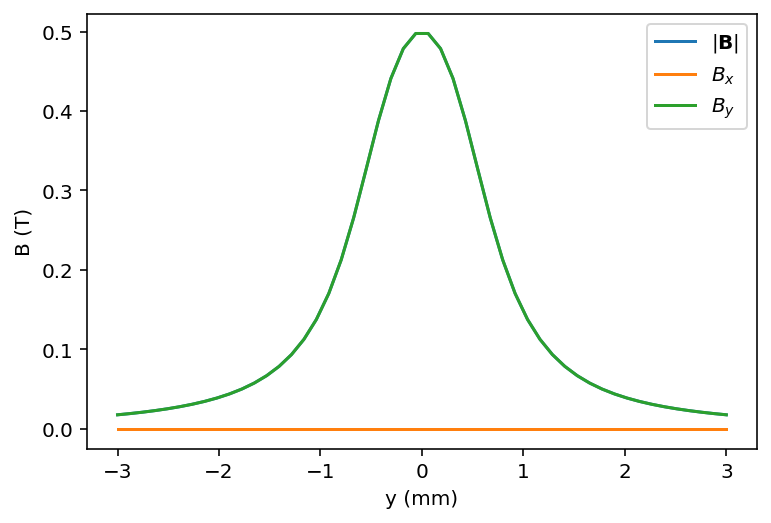

In [4]:
x = 0.0
y = np.linspace(-3*height, 3*height)

B = pm.B_calc_2D(x, y)

pm.plots.plot_2D_line(y/1e3, B, xlab='y (mm)')


In [5]:
pm.reset_magnets()

width = 1
height = width
center = (0, -width/2)
theta = 45.0

m_rec = pm.magnets.Rectangle(width=width, height=height)
m_rec
print(pm.B_calc_2D(0.0, 0.0))

([0.], [0.5], [0.5])


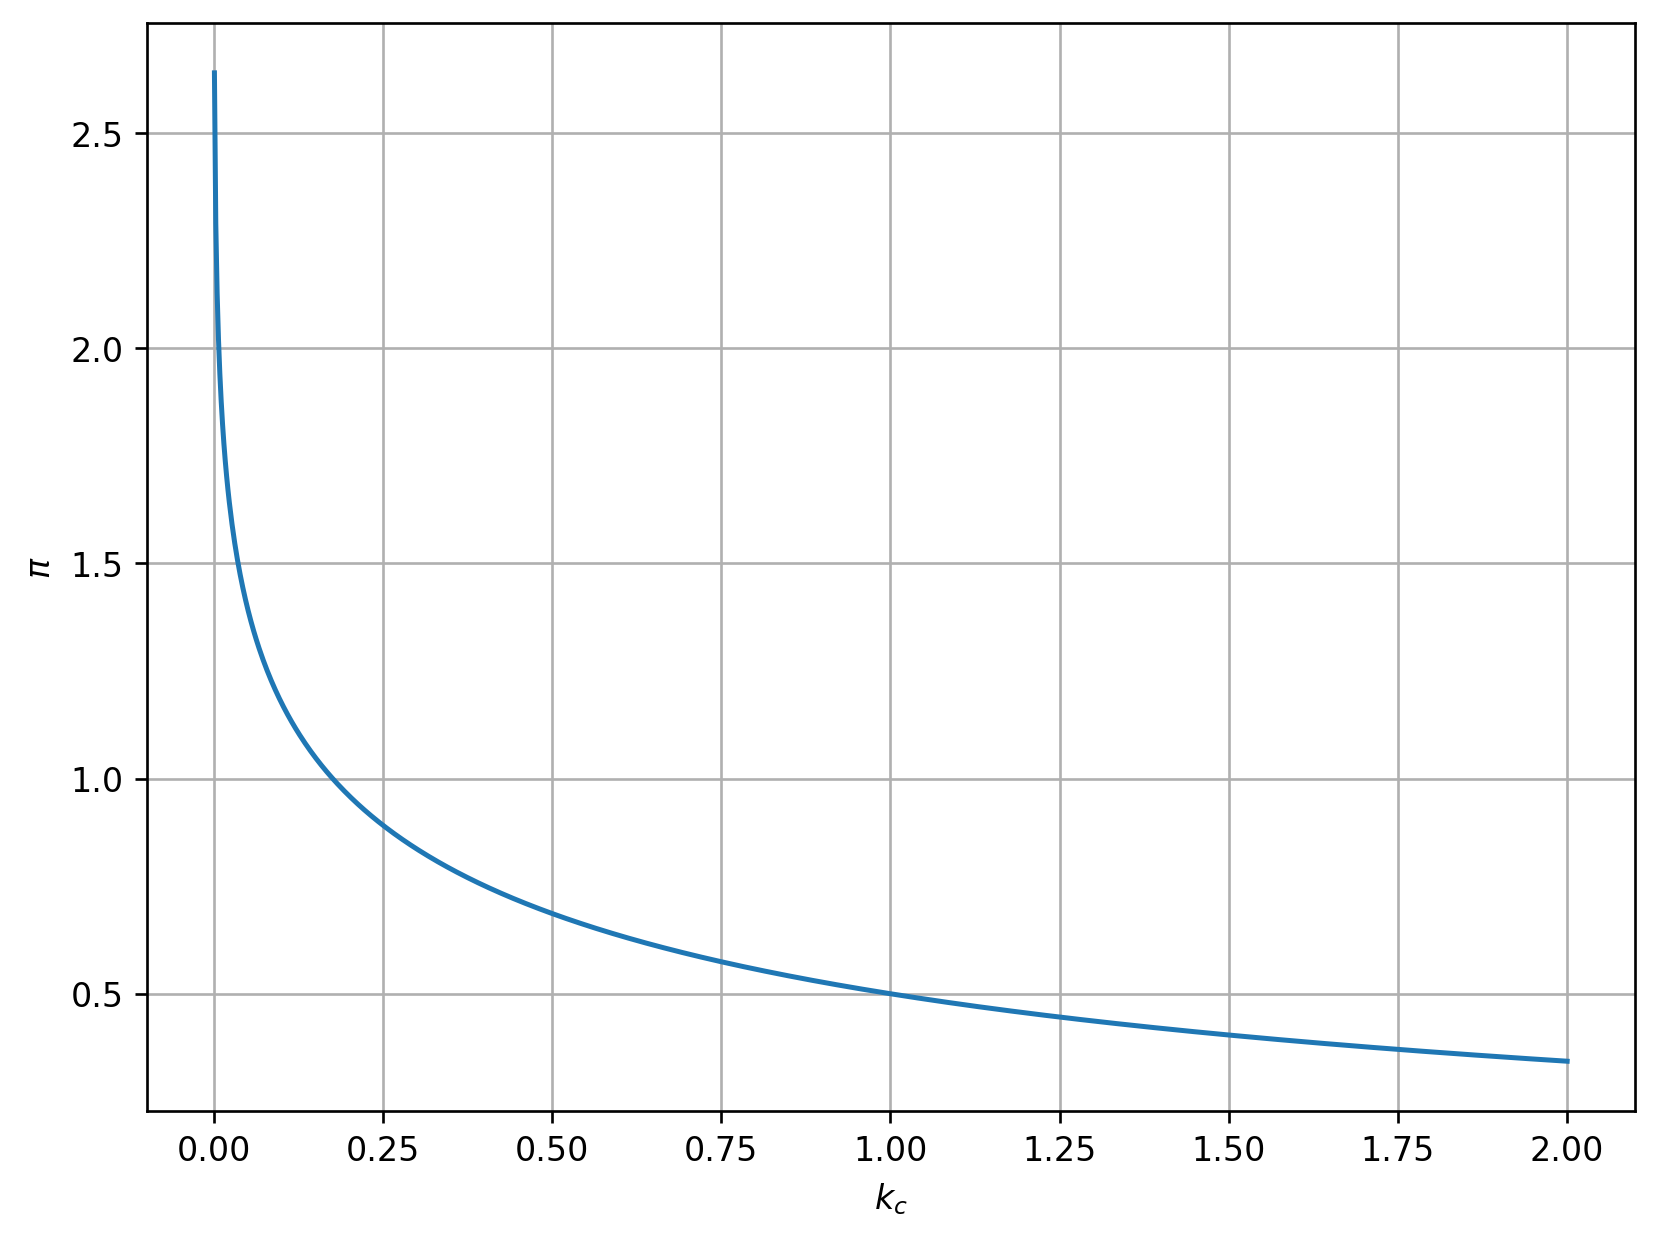

0.5


In [6]:
# Example of direct access to the private functions.
# Here we use 

%matplotlib inline
# %matplotlib notebook

kc  = np.linspace(0.001, 2, 1001)

# kc = 2.45
p, c, s = 1, 1, 1
y = pm.magnets.Cylinder._cel(kc, p, c, s)

fig, ax = plt.subplots(figsize=(8,6), dpi=120)
plt.plot(kc, y/np.pi)
plt.xlabel(r'$k_c$')
plt.ylabel(r'$\pi$')
plt.grid(True)
plt.show()

print(pm.magnets.Cylinder._cel(1.0, p, c, s)/np.pi)

Magnetic field 1 mm above the surface of the magnet

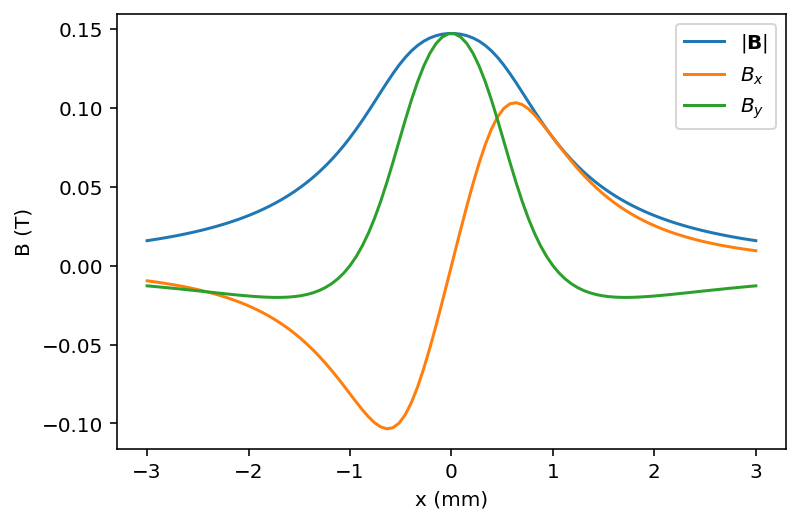

In [7]:
x = np.linspace(-3*width, 3*width, 100)
y = 1e-3 + height

B = pm.B_calc_2D(x, y)
pm.plots.plot_2D_line(x/1e3, B)

What about magnetisation direction, $\theta$?

In [8]:
m_rec2 = pm.magnets.Rectangle(width, height, center = center, phi = 45)
m_rec2

pm.list_magnets()

Rectangle
J: [0.707107 0.707107] (T)
Size: [1 1] (m)
Center [ 0.  -0.5] (m)
Orientation: alpha 0.0

Rectangle
J: [0. 1.] (T)
Size: [1 1] (m)
Center [0. 0.] (m)
Orientation: alpha 0.0



In [9]:
m_rect3 = pm.magnets.Rectangle(width, height, center = center, phi = 45)
m_rect3

Rectangle
J: [0.707107 0.707107] (T)
Size: [1 1] (m)
Center [ 0.  -0.5] (m)
Orientation: alpha 0.0

Let's look at the magnets we have stored in memory

Let's reset the magnets and start again

In [10]:
pm.reset_magnets()

Define our magnets

In [11]:
width = 20e-3
height = 30e-3
phi = 90.0

m1 = pm.magnets.Rectangle(width, height,center=(-width/2, 0), Jr =1.0, phi=phi)
m2 = pm.magnets.Rectangle(width, height, center=(width/2, 0), Jr =1.0, phi=phi)


In [12]:
pm.list_magnets();

Rectangle
J: [0. 1.] (T)
Size: [0.02 0.03] (m)
Center [0.01 0.  ] (m)
Orientation: alpha 0.0

Rectangle
J: [0. 1.] (T)
Size: [0.02 0.03] (m)
Center [-0.01  0.  ] (m)
Orientation: alpha 0.0



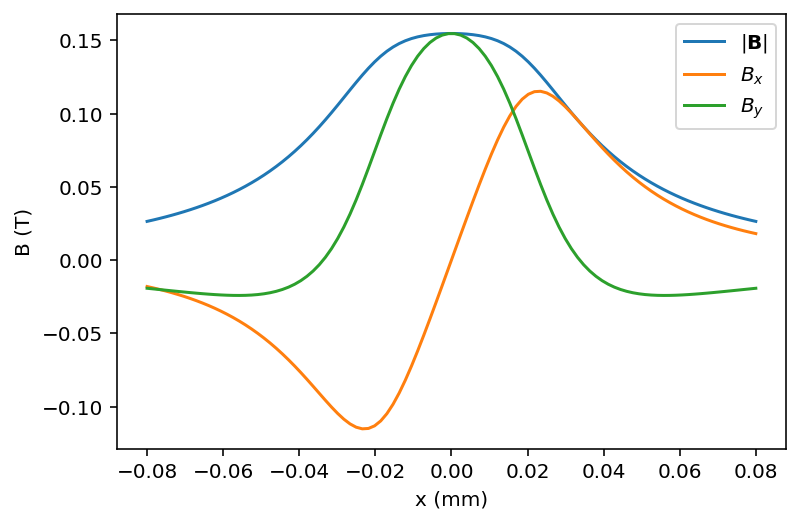

In [13]:
x = np.linspace(-4*width, 4*width, 100)
y = 1e-3 + height

B = pm.B_calc_2D(x, y)
pm.plots.plot_2D_line(x/1e3, B)

## Contour Plots

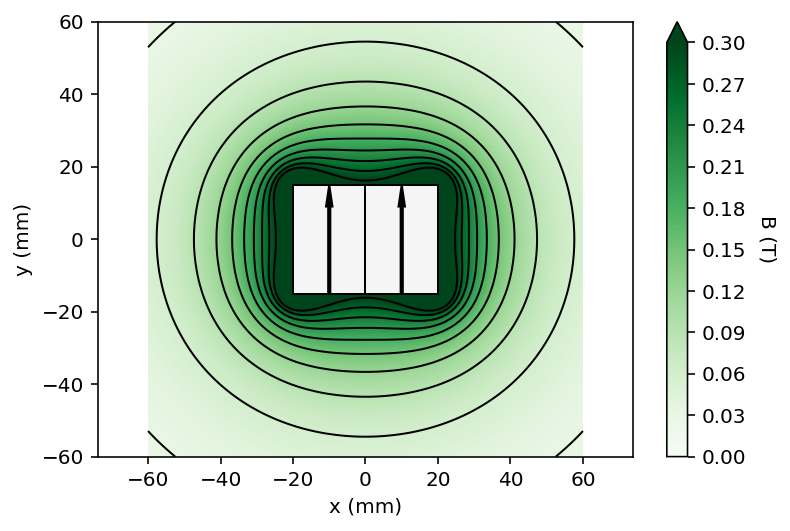

In [14]:
x, y = pm.grid2D(3*width, 2*height)
B = pm.B_calc_2D(x, y)
cmap = 'Greens'
# A small routine to figure out where the white boxes and arrows should go
pm.plots.plot_2D_contour(x, y, B, UL = 0.5, NL = 11, cmap = cmap)


Let's play with the parameters

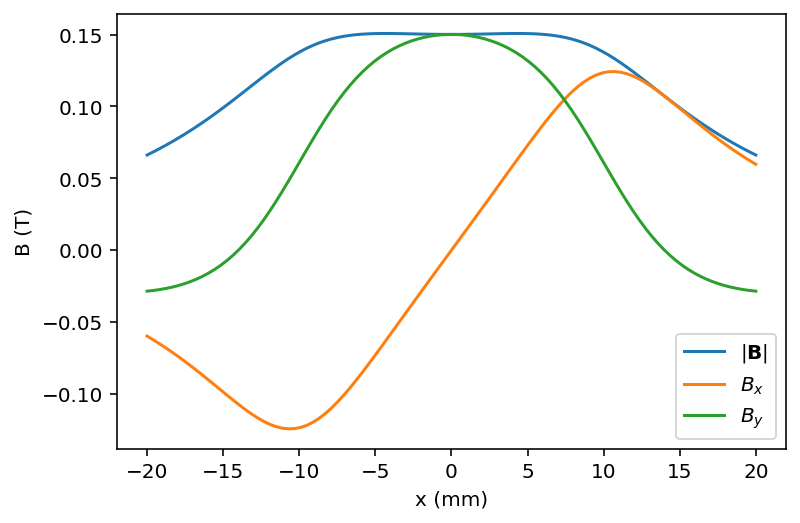

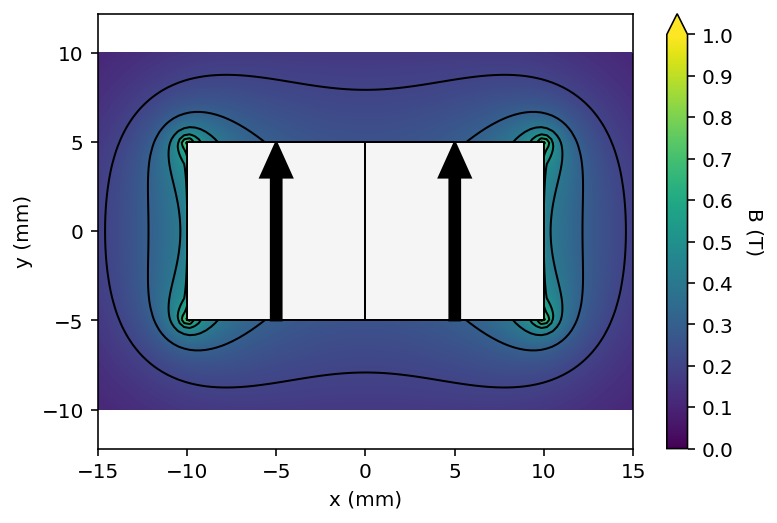

In [15]:
pm.reset_magnets()
width = 10e-3
height = 10e-3
phi = 90
_ = pm.magnets.Rectangle(width=width, height=height, center=(-width/2, 0), Jr=1.0, phi=phi)
_ = pm.magnets.Rectangle(width=width, height=height, center=(width/2, 0), Jr=1.0, phi=phi)
pm.plots.param_test_2D(width, height) # This helper function is only useful for this example

In [16]:
list(pm.magnets.Rectangle.instances)[0]

Rectangle
J: [0. 1.] (T)
Size: [0.01 0.01] (m)
Center [-0.005  0.   ] (m)
Orientation: alpha 0.0

## Two Magnets Spaced Apart

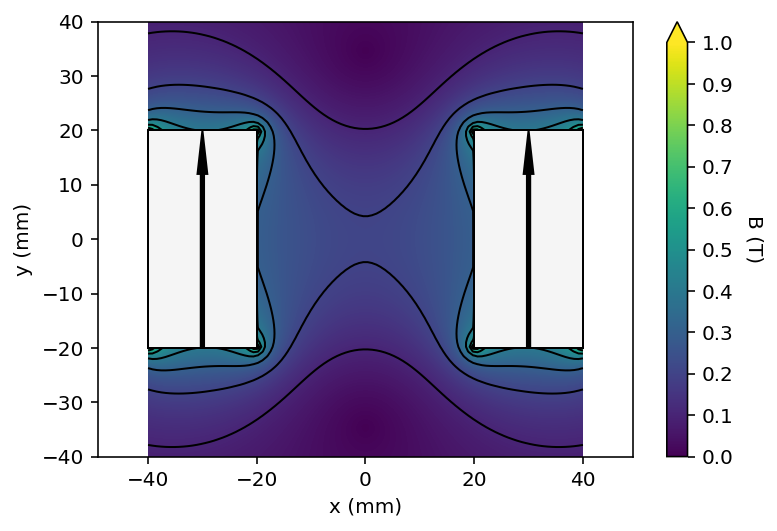

In [28]:
pm.reset_magnets()
width = 20e-3
height = 40e-3
hGap = 20e-3

phi = 90

center = (-width/2 - hGap, 0)
_ = pm.magnets.Rectangle(width=width, height=height, center=(-width/2 - hGap, 0), Jr=1.0, phi=phi)
center = (width/2 + hGap, 0)

_ = pm.magnets.Rectangle(width=width, height=height, center=(width/2 + hGap, 0), Jr=1.0, phi=phi)

x, y = pm.grid2D(2*width, height)
B = pm.B_calc_2D(x, y)

cmap = 'viridis'
pm.plots.plot_2D_contour(x, y, B, cmin=0, cmax=1.0, num_levels=11, cmap=cmap)

## Challenge 1

Create a Pseudo quadrupole magnet with this configuration:

Consists of 4 cubes of size 20 $\times$ 20 mm$^2$, magnetised in x with a horizontal gap 20 mm, for this geometry:

![quad_diagram](00_tests/quad_diagram.png)

The plot should look something like this:
    
![challenge_2d_pseudo_quad](img/challenge_2d_pseudo_quad.png)

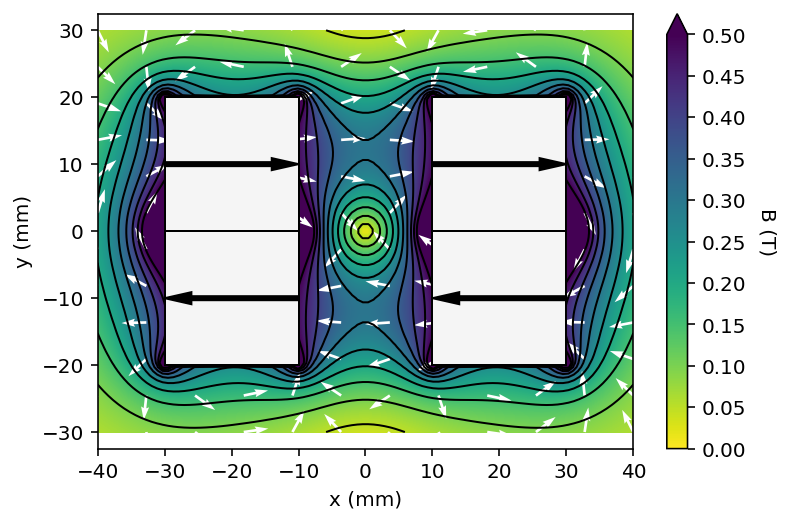

In [18]:
pm.reset_magnets()
width = 20e-3 # cube size
hGap = 10e-3 # half the gap width

cmap = 'viridis_r' # colormap NOTE THE REVERSED COLORMAP!!!!
phi = 0.0 # angle between magnetisation and the x-axis

_ = pm.magnets.Square(width = width, Jr = -1.0, center=(-width/2 - hGap, -width/2), phi = phi)
_ = pm.magnets.Square(width = width, Jr = 1.0, center=(-width/2 - hGap, width/2), phi = phi)
_ = pm.magnets.Square(width = width, Jr = -1.0, center=(width/2 + hGap, -width/2), phi = phi)
_ = pm.magnets.Square(width = width, Jr = 1.0, center=(width/2 + hGap, width/2), phi = phi)


x, y = pm.grid2D(2*width, 1.5*width) # This calculates the grid of x,y points
B = pm.B_calc_2D(x, y) # This runs the calculation


# Finally plot the data
pm.plots.plot_2D_contour(x, y, B, cmax=0.5, num_levels=11, cmap=cmap,
                         vector_plot = True, vector_arrows = 11, vector_color='w')

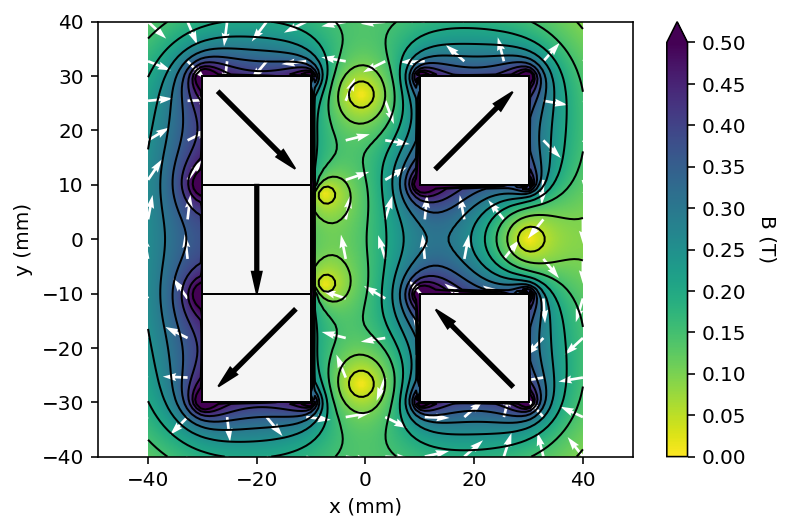

In [19]:
pm.reset_magnets()
width = 20e-3 # cube size
hGap = 10e-3 # half the gap width

cmap = 'viridis_r' # colormap
phi = 0.0 # angle between magnetisation and the x-axis

_ = pm.magnets.Square(width = width, Jr = -1.0, center=(-width, -width), phi = 45)
_ = pm.magnets.Square(width = width, Jr = -1.0, center=(-width, 0), phi = 90)


_ = pm.magnets.Square(width = width, Jr = 1.0, center=(-width, width), phi = -45)
_ = pm.magnets.Square(width = width, Jr = -1.0, center=(width, -width), phi = -45)
_ = pm.magnets.Square(width = width, Jr = 1.0, center=(width, width), phi = 45)


x, y = pm.grid2D(2*width, 2*width) # This calculates the grid of x,y points
B = pm.B_calc_2D(x, y) # This runs the calculation


# Finally plot the data
pm.plots.plot_2D_contour(x, y, B, cmax=0.5, num_levels=11, cmap=cmap,
                         vector_plot = True, vector_arrows = 11, vector_color='w')

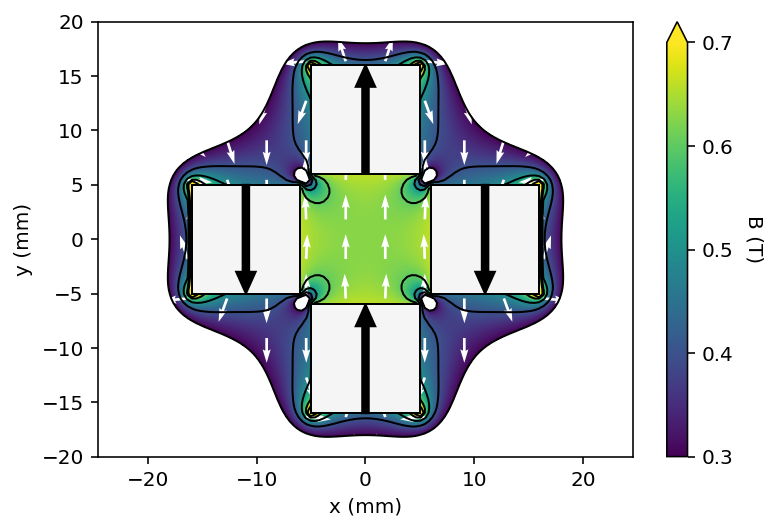

([0.], [0.6286433], [0.6286433])


In [37]:
pm.reset_magnets()
width = 10e-3 # cube size
wall = 1e-3 # half the gap width


Jr = 1.26
cmap = 'viridis' # colormap
phi = 90.0 # angle between magnetisation and the x-axis

_ = pm.magnets.Square(width = width, Jr = Jr, center=(0, width + wall), phi = phi)
_ = pm.magnets.Square(width = width,Jr = -Jr, center=(width + wall, 0), phi = phi)
_ = pm.magnets.Square(width = width, Jr = Jr, center=(0, -width - wall), phi = phi)
_ = pm.magnets.Square(width = width, Jr = -Jr, center=(-width - wall, 0), phi = phi)


x, y = pm.grid2D(2*width, 2*width) # This calculates the grid of x,y points
B = pm.B_calc_2D(x, y) # This runs the calculation



# Finally plot the data
pm.plots.plot_2D_contour(x, y, B, cmin = 0.3, cmax=0.7, num_levels=5, cmap=cmap, vector_plot = True)

print(pm.B_calc_2D(0, 0))

/Users/peter/Documents/4months/python/pymagnet/src/pymagnet/magnets/_routines2.py:42: RuntimeWarning: invalid value encountered in add
  B.x += Bx


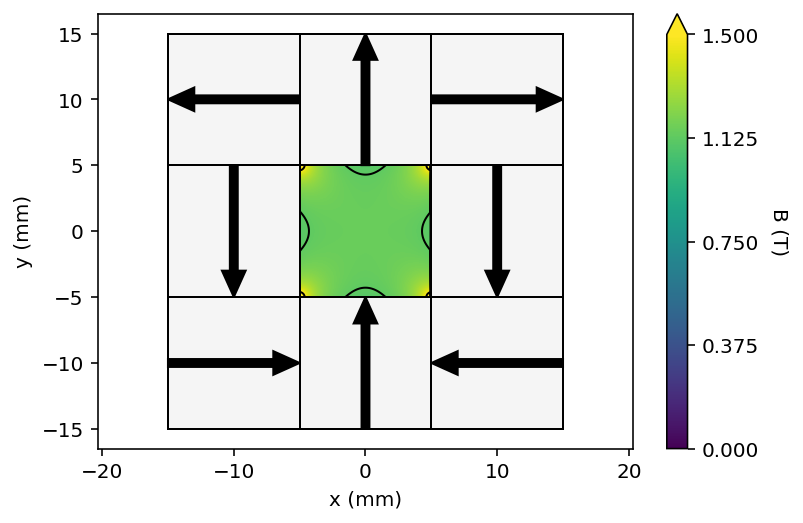

([0.], [1.15357557], [1.15357557])


In [30]:
# %matplotlib notebook
pm.reset_magnets()
width = 10e-3 # cube size
wall = 0 # half the gap width


Jr = 1.26
cmap = 'viridis' # colormap
phi = 90.0 # angle between magnetisation and the x-axis

_ = pm.magnets.Square(width = width, Jr = Jr, center=(0, width + wall), phi = phi)
_ = pm.magnets.Square(width = width, Jr = -Jr, center=(width + wall, 0), phi = phi)
_ = pm.magnets.Square(width = width, Jr = Jr, center=(0, -width - wall), phi = phi)
_ = pm.magnets.Square(width = width, Jr = -Jr, center=(-width - wall, 0), phi = phi)

_ = pm.magnets.Square(width = width, Jr = Jr, center=(width, width + wall), phi = 0)
_ = pm.magnets.Square(width = width, Jr = -Jr, center=(width, -width + wall), phi = 0)
_ = pm.magnets.Square(width = width, Jr = -Jr, center=(-width, width + wall), phi = 0)
_ = pm.magnets.Square(width = width, Jr = Jr, center=(-width, -width + wall), phi = 0)


x, y = pm.grid2D(width/2, width/2) # This calculates the grid of x,y points
B = pm.B_calc_2D(x, y) # This runs the calculation



# Finally plot the data
pm.plots.plot_2D_contour(x, y, B,
                         field_component = 'n',
                         cmin = 0, cmax=1.5, num_levels=5,
                         cmap=cmap,
                         vector_plot = False,
                         vector_color = 'w',
                         vector_arrows = 11)

print(pm.B_calc_2D(0, 0))

## Challenge 2

Following the presentation of Nora yesterday, create an array of 4 rectangular magnets:

* 20 µm wide
* 38 µm thick
* Pitch (centre-to-centre distance) 20 µm 
* $J_r$ = 1.0 T

__Remember__: a, b are the __half__ sizes. The width is 2a, height 2b.
And calculate the magnetic field 1 µm above the array
![dempsey_micro_array](img/dempsey_micro_array.png)



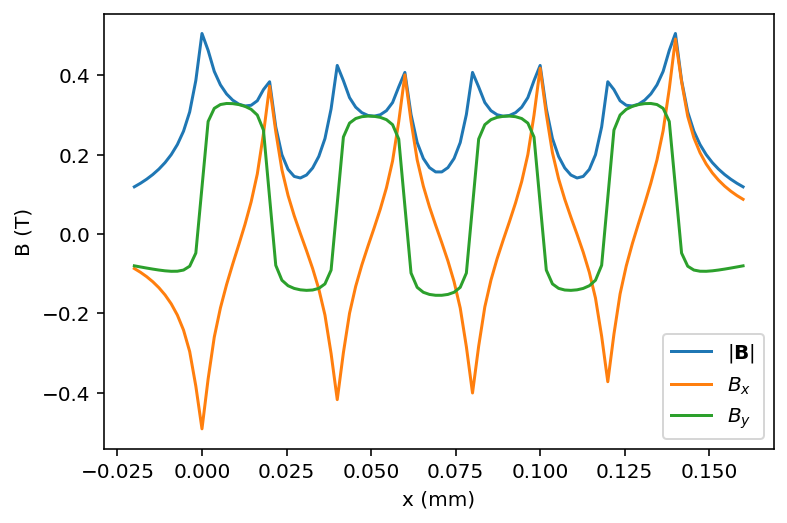

In [25]:
pm.reset_magnets()
width = 20e-6
height = 38e-6
pitch = 40e-6
cmap = 'viridis'
phi = 90.0
N_mag = 4
alternate = False
if alternate:
    k = -1
else:
    k = 1

for val in range(N_mag):
    _ = pm.magnets.Rectangle(width = width, height = height,
                             Jr = 1.0*(k)**val, center=(width/2 + val*pitch, -height/2), phi = phi)


x = np.linspace(-width, N_mag*(width/2 + pitch) - pitch, 100)
y = 1e-6

B = pm.B_calc_2D(x, y)
pm.plots.plot_2D_line(x, B)

In [26]:
pm.list_magnets();

Rectangle
J: [0. 1.] (T)
Size: [2.0e-05 3.8e-05] (m)
Center [ 9.0e-05 -1.9e-05] (m)
Orientation: alpha 0.0

Rectangle
J: [0. 1.] (T)
Size: [2.0e-05 3.8e-05] (m)
Center [ 1.0e-05 -1.9e-05] (m)
Orientation: alpha 0.0

Rectangle
J: [0. 1.] (T)
Size: [2.0e-05 3.8e-05] (m)
Center [ 5.0e-05 -1.9e-05] (m)
Orientation: alpha 0.0

Rectangle
J: [0. 1.] (T)
Size: [2.0e-05 3.8e-05] (m)
Center [ 1.3e-04 -1.9e-05] (m)
Orientation: alpha 0.0



### Contour Plot

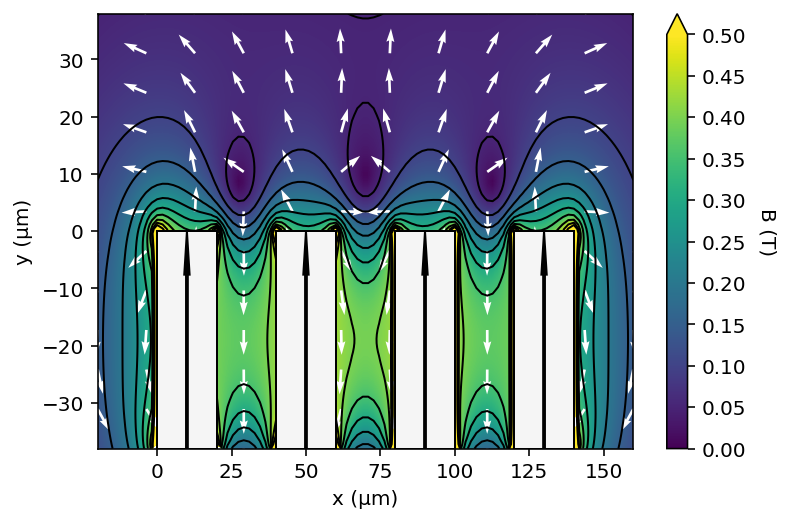

In [27]:
x, y = pm.grid2D(N_mag*(width/2 +pitch) - pitch, height, lx=-width, ly=-height)

B = pm.B_calc_2D(x, y)
pm.plots.plot_2D_contour(x, y, B,
                         cmax=0.5, num_lines=11, cmap=cmap, axis_scale='auto',
                         scale_x = 1e-6, scale_y = 1e-6,
                         xlab = 'x (µm)',
                         ylab = 'y (µm)',
                         vector_plot = True)

## Any Questions?

### End of Part 2/3